# Simple demonstration with the Iris dataset
To best illustrate how this package can serve as an interface to further manipulate the nodes and edges of the plotted tree diagram, we will consider the well-known Iris dataset and use scikit-learn's `DecisionTreeClassifier` to train a classification tree.

As usual (see [documentation from scikit-learn](https://scikit-learn.org/stable/modules/tree.html#classification)), we will first load the dataset then construct the decision tree.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

One can choose to directly plot the tree.

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

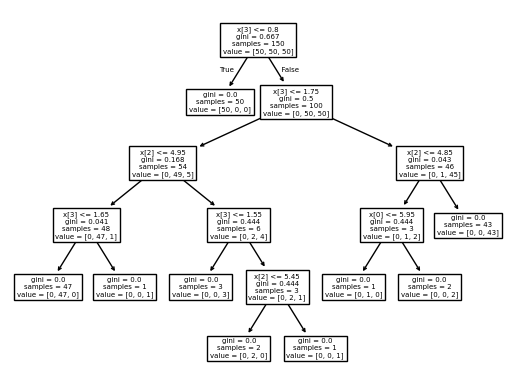

In [2]:
tree.plot_tree(clf)

Scikit-learn has also provided several interfaces to carry out some surface-level modifications, for example:

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.67\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.17\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.04\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.44\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2]

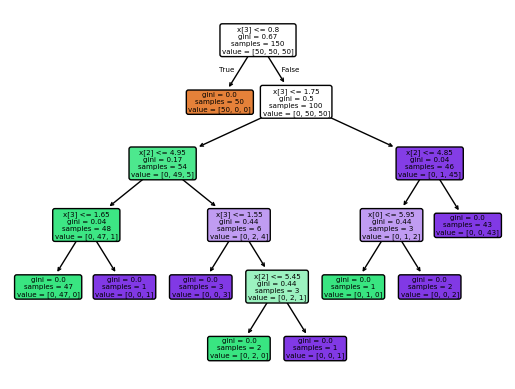

In [3]:
tree.plot_tree(clf, filled=True, rounded=True, precision=2)

However, to make nuanced changes, one must directly modify the DOT script generated by scikit-learn, which is used to render the tree plot using a [Graphviz](https://graphviz.org/) backend.

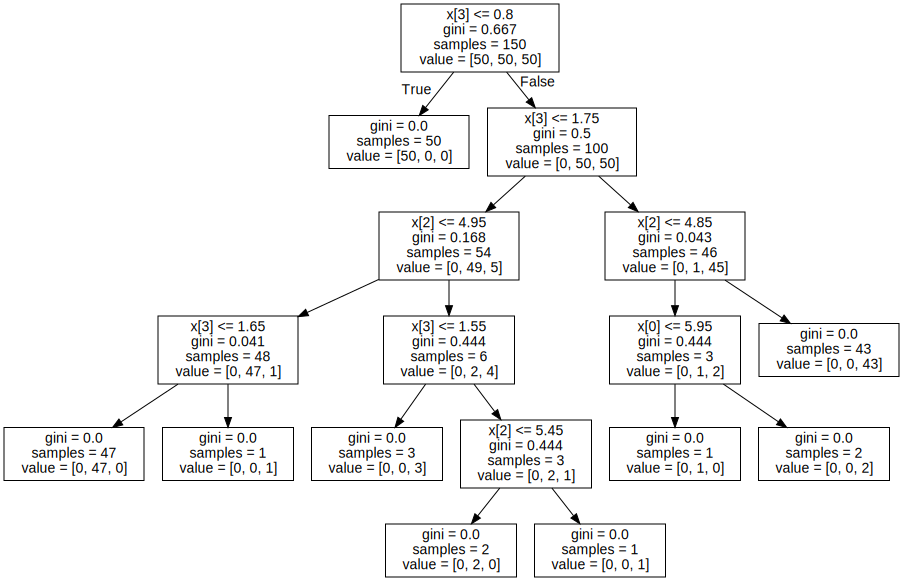

In [4]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
display(graph)

The `export_graphviz` function already has a few options, that can allow one to make basic modifications. For example, we can:
1. Remove the `impurity`
2. Reduce the labels to more minimalistic lables
3. Change the font style to `Arial`.

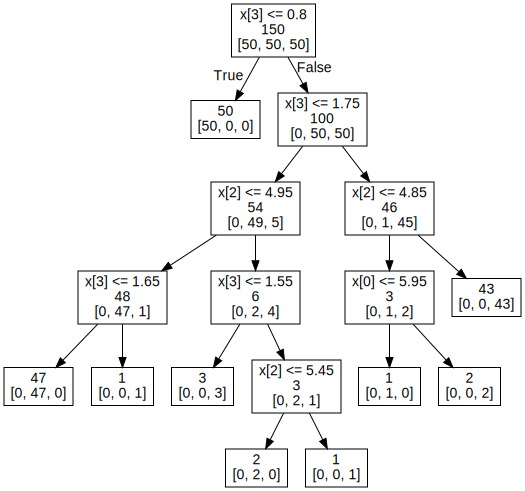

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, impurity=False, label="none", fontname="Arial")
graph = graphviz.Source(dot_data)
display(graph)

The variable `dot_data` is simplying a Python string, which is passed into the function `graphviz.Source()` to render the tree plot. Hence, one has to simply modify the `dot_data` string appropriately, and pass it to Graphviz to generate a tree with desired changes.

Thus, this library simply offers a simpler interface to manipulate the DOT string representation. We will show a few examples of what we can do with `draw_scikit_tree`

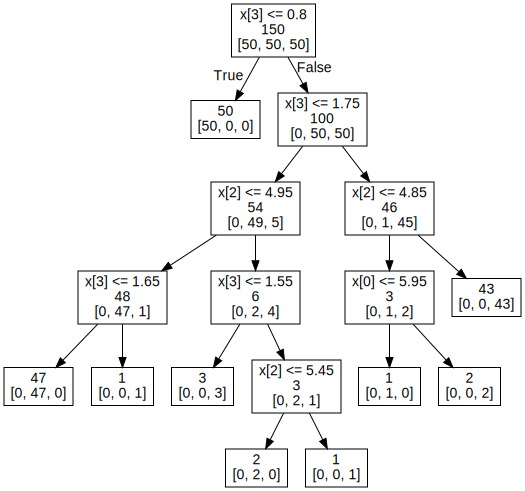

In [7]:
from DrawScikitTree import TreeGraph
treeGraph = TreeGraph(clf, impurity=False, label="none", fontname="Arial")
new_dot_data = treeGraph.export()
graph = graphviz.Source(new_dot_data)
display(graph)

We can get all the `Nodes`, `Leaves` and `Edges` that make up the tree.

In [8]:
Nodes = treeGraph.Nodes
Edges = treeGraph.Edges
Leaves = treeGraph.Leaves

Let's just randomly pick the fifth `Node` and manipulate it by doing the following:
1. Change its label to `Test Node!`
2. Change its shape to a diamond
3. Change the color of its outline
4. Change the thickness of its outline

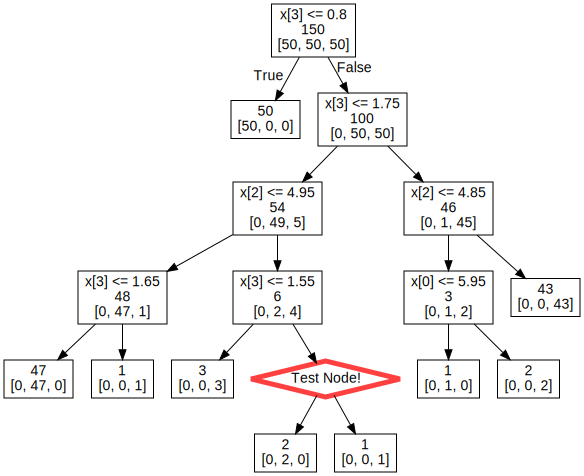

In [10]:
node = Nodes[5]
node.set_label(f"Test Node!")
node.set_shape("diamond")
node.set_color(255, 0, 0, 0.75)
node.set_penwidth(5.0)

# Let's check out the newly modified tree!
new_dot_data = treeGraph.export()
graph = graphviz.Source(new_dot_data)
display(graph)

Next, let's manipulate a leaf. Let's also randomly pick the second `Leaf` and manipulate it by doing the following:
1. Change its label to `Test\nLeaf!`
2. Change its shape to a oval
3. Change the color of its outline
4. Change the thickness of its outline

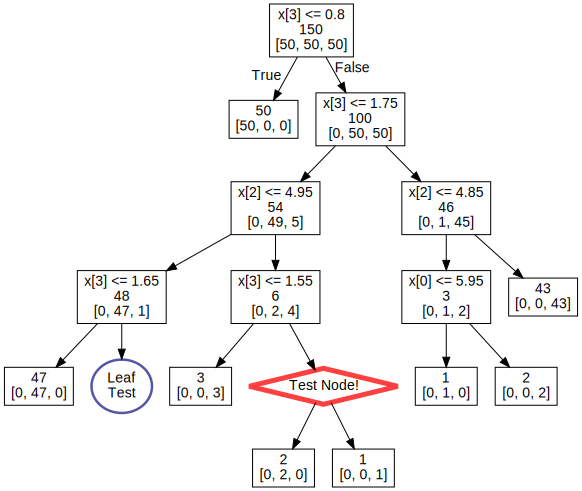

In [11]:
leaf = Leaves[2]
leaf.set_label(f"Leaf\\nTest")
leaf.set_shape("oval")
leaf.set_color(30, 30, 135, 0.75)
leaf.set_penwidth(2.5)

# Let's check out the newly modified tree!
new_dot_data = treeGraph.export()
graph = graphviz.Source(new_dot_data)
display(graph)

Now, perhaps you're interested in observing how the trained decision tree can be used to make inferences on some test samples, then marking the paths red.

Let's just randomly examine the 3rd, 70th, and 35th samples.

node_index for 0: [0 1]
Rules used to predict Sample 0 (0):
 - Decision node 0 : (X_test[0, 3] = 0.2) <= 0.800000011920929)
node_index for 1: [ 0  2 12 13 14]
Rules used to predict Sample 1 (1):
 - Decision node 0 : (X_test[1, 3] = 1.8) > 0.800000011920929)
 - Decision node 2 : (X_test[1, 3] = 1.8) > 1.75)
 - Decision node 12 : (X_test[1, 2] = 4.8) <= 4.8500001430511475)
 - Decision node 13 : (X_test[1, 0] = 5.9) <= 5.950000047683716)
node_index for 2: [0 1]
Rules used to predict Sample 2 (2):
 - Decision node 0 : (X_test[2, 3] = 0.2) <= 0.800000011920929)


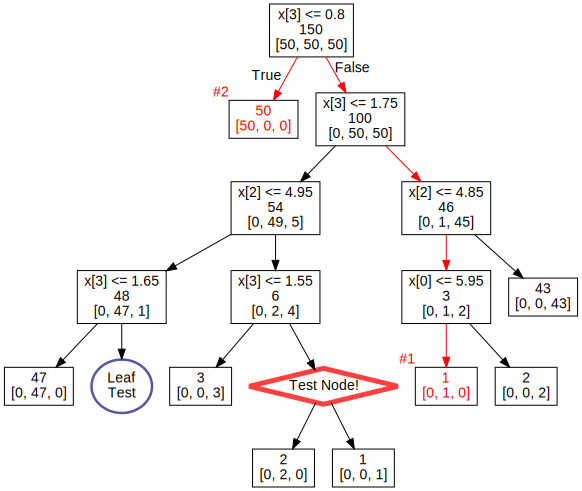

In [12]:
# Get some samples
X_sample = X[[3, 70, 35], :]

# Setting verbose=True will print out the decision paths for each sample
treeGraph.trace_paths(X_sample, color="red", verbose=True)

# Let's check out the newly modified tree!
new_dot_data = treeGraph.export()
graph = graphviz.Source(new_dot_data)
display(graph)

To indicate how many of the given test samples end up in the same leaf node, the count is included in the top left corner, prefixed with `#`.

To save the graph use the `.render()` function

In [15]:
treeGraph.render("file_name", format="svg")
# Other available file formats: pdf, eps, jpg, png